In [4]:
import numpy as np
import torch as th

from Utils import prices

import matplotlib.pyplot as plt

In [5]:
vol = np.array([0.0, 0.0, 0.5,0.5, 1.0, 1.0])
drift = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0])
dt = 1/365

gbm = prices.geometric_brownian_motion(6, 50, drift, vol, 1.0, dt)

In [10]:
gbm[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

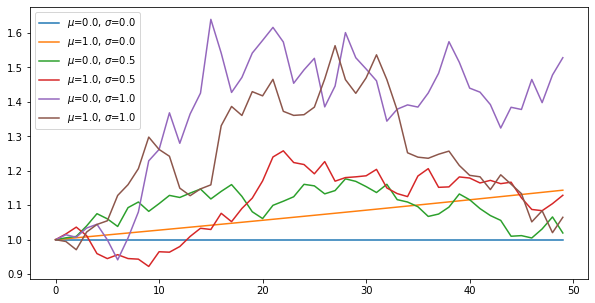

In [15]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.plot(gbm[:, i], label=rf'$\mu$={drift[i]}, $\sigma$={vol[i]}')
plt.legend()
plt.show()

In [29]:
from Env.env import BSMarketEval

env = BSMarketEval(n_assets=1000, cost=0.02, volatility=0.4, drift=1.0)

env 'BSMarket was created!


In [30]:
def delta_eval(env, n=1):
    result = []
    for _ in range(n):
        obs = env.reset()
        done, info = False, {}
        while not done:
            moneyness, expiry, vol, drift = [obs['obs'][..., i] for i in range(4)]
            action = prices.european_call_delta(moneyness, expiry, vol)
            obs, reward, done, info = env.step(action)
        result.append(env.raw_reward.copy())

    result = np.array(result)
    return np.mean(result, axis=0)

def delta_eval2(env, n=1):
    result = []
    for _ in range(n):
        obs = env.reset()
        done, info = False, {}
        while not done:
            moneyness, expiry, vol, drift = [obs['obs'][..., i] for i in range(4)]
            action = prices.european_call_delta(moneyness, expiry, vol, drift)
            obs, reward, done, info = env.step(action)
        result.append(env.raw_reward.copy())

    result = np.array(result)
    return np.mean(result, axis=0)

In [31]:
pnl1 = delta_eval(env, 100)
pnl2 = delta_eval2(env, 100)

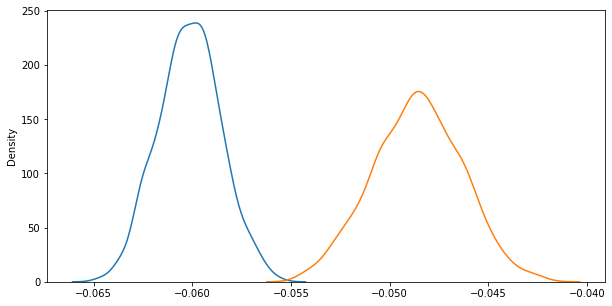

In [32]:
import seaborn as sb

plt.figure(figsize=(10,5))
sb.kdeplot(pnl1)
sb.kdeplot(pnl2)
plt.show()

In [ ]:
pnl1